In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Consumer_Complaints (1).csv')
print(data)

        Date received           Product  \
0          03-12-2014          Mortgage   
1          10-01-2016  Credit reporting   
2          10/17/2016     Consumer Loan   
3          06-08-2014       Credit card   
4          09/13/2014   Debt collection   
...               ...               ...   
1025005    04-10-2017   Debt collection   
1025006    02-07-2017   Debt collection   
1025007    01-04-2017          Mortgage   
1025008    09/28/2015   Debt collection   
1025009    08/19/2016   Debt collection   

                                   Sub-product  \
0                               Other mortgage   
1                                          NaN   
2                                 Vehicle loan   
3                                          NaN   
4                                  Credit card   
...                                        ...   
1025005                            Credit card   
1025006  Other (i.e. phone, health club, etc.)   
1025007            Conventional f

In [ ]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [ ]:
print('Shape of data',data.shape)

Shape of data (1025010, 19)


In [ ]:
print('Shape of data',data.shape)

Shape of data (1025010, 19)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
data['Product'].nunique()

18

In [ ]:
print('Shape of data',data.shape)

Shape of data (1025010, 19)


In [ ]:
df=data[['Consumer Complaint','Product']]
print('Shape of data',df.shape)

Shape of data (1025010, 2)


In [ ]:
# n = 900000

# # Dropping last n rows using drop
# df.drop(df.tail(n).index,
#         inplace = True)

# # Printing dataframe
# print(df)

In [ ]:
print('Before dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))
df.dropna(inplace=True)
print('='*80)
print('After dropping the nulls')
display('Null count', df.isna().sum())
print('Total rows of data', len(df))

Before dropping the nulls


'Null count'

Consumer Complaint    747196
Product                    0
dtype: int64

Total rows of data 1025010
After dropping the nulls


<ipython-input-17-305aa8f701af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


'Null count'

Consumer Complaint    0
Product               0
dtype: int64

Total rows of data 277814


In [ ]:
print('Shape of data',df.shape)

Shape of data (277814, 2)


In [ ]:
df.tail()

,Consumer Complaint,Product
1025002,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,Debt collection
1025003,"On XXXX/XXXX/13, without my authorization, Ban...",Bank account or service
1025006,I had an account with XXXX in XX/XX/XXXX this ...,Debt collection
1025007,I was contacted on XX/XX/XXXX email by XXXX fr...,Mortgage
1025009,I had a debit that was included in my chapter ...,Debt collection


In [ ]:
df['Product'].nunique()

18

In [ ]:
# df['Consumer Complaint'][0]

In [ ]:
list(df.Product.unique())

['Credit reporting',
 'Consumer Loan',
 'Debt collection',
 'Mortgage',
 'Credit card',
 'Other financial service',
 'Bank account or service',
 'Student loan',
 'Money transfers',
 'Payday loan',
 'Prepaid card',
 'Money transfer, virtual currency, or money service',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Checking or savings account',
 'Vehicle loan or lease',
 'Credit card or prepaid card',
 'Virtual currency',
 'Payday loan, title loan, or personal loan']

In [ ]:
df['Product'].value_counts()

Debt collection                                                                 63268
Credit reporting, credit repair services, or other personal consumer reports    49006
Mortgage                                                                        43837
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    16689
Bank account or service                                                         14887
Credit card or prepaid card                                                     10659
Consumer Loan                                                                    9474
Checking or savings account                                                      6489
Money transfer, virtual currency, or money service                               3089
Vehicle loan or lease                                 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                            df['Consumer Complaint'], df['Product'],
                                            test_size=0.25, random_state=0, stratify=df['Product'])
print(f'Training utterances: {len(X_train)} of shape {X_train.shape}')
print(f'Validation utterances: {len(X_test)} of shape {X_test.shape}')

Training utterances: 208360 of shape (208360,)
Validation utterances: 69454 of shape (69454,)


In [ ]:
display(y_train.value_counts())

Debt collection                                                                 47451
Credit reporting, credit repair services, or other personal consumer reports    36754
Mortgage                                                                        32878
Credit reporting                                                                23695
Credit card                                                                     14131
Student loan                                                                    12517
Bank account or service                                                         11165
Credit card or prepaid card                                                      7994
Consumer Loan                                                                    7105
Checking or savings account                                                      4867
Money transfer, virtual currency, or money service                               2317
Vehicle loan or lease                                 

In [ ]:
display(y_test.value_counts())

Debt collection                                                                 15817
Credit reporting, credit repair services, or other personal consumer reports    12252
Mortgage                                                                        10959
Credit reporting                                                                 7898
Credit card                                                                      4711
Student loan                                                                     4172
Bank account or service                                                          3722
Credit card or prepaid card                                                      2665
Consumer Loan                                                                    2369
Checking or savings account                                                      1622
Money transfer, virtual currency, or money service                                772
Vehicle loan or lease                                 

In [ ]:
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<208360x86532 sparse matrix of type '<class 'numpy.float64'>'
 	with 11350978 stored elements in Compressed Sparse Row format>,
 <69454x86532 sparse matrix of type '<class 'numpy.float64'>'
 	with 3762638 stored elements in Compressed Sparse Row format>)

In [ ]:
print(X_train_vec)

  (0, 20418)	0.1477539061025849
  (0, 64384)	0.1271806722048825
  (0, 29756)	0.3684903182182152
  (0, 19856)	0.15361928063324332
  (0, 10157)	0.23677683511919237
  (0, 64390)	0.13006209998621235
  (0, 34423)	0.2714164745570698
  (0, 40599)	0.27209399717260746
  (0, 39576)	0.17110296947938333
  (0, 21191)	0.06601713268297214
  (0, 63955)	0.2633166497023978
  (0, 9603)	0.20044049813995068
  (0, 62677)	0.14912643479241197
  (0, 5775)	0.24243029084139978
  (0, 63744)	0.19781118960317726
  (0, 71393)	0.18678609770446955
  (0, 64419)	0.19240743494263468
  (0, 36459)	0.20217935775275572
  (0, 32264)	0.13998868497489883
  (0, 30718)	0.25645684244338895
  (0, 76290)	0.11818324612507772
  (0, 52352)	0.16617994202405892
  (0, 50559)	0.1874864084708512
  (0, 70883)	0.20917490473900416
  (1, 84491)	0.071366274539557
  :	:
  (208359, 66480)	0.1397467003868921
  (208359, 56338)	0.10843409205784414
  (208359, 1147)	0.15243893048284687
  (208359, 55749)	0.3341388299186065
  (208359, 75933)	0.1460804481

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=100

ch2 = SelectKBest(chi2, k=n_features)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp  = ch2.transform(X_test_vec)

X_train_sp, X_test_sp

(<208360x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1053924 stored elements in Compressed Sparse Row format>,
 <69454x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 350184 stored elements in Compressed Sparse Row format>)

In [ ]:
cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(208360, 100) (69454, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.112384,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208355,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
208356,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.054086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.352846,0.0,0.0,0.0,0.0
208357,0.111092,0.095295,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
208358,0.092511,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max()

(0, 17, 0, 17)

In [ ]:
n=5
print('Text   Encoding')
print('-'*50)
for p,q in zip(y_train[:n].values,y_train_num):
    print(f'{q}      {p}')

Text   Encoding
--------------------------------------------------
15      Student loan
7      Debt collection
6      Credit reporting, credit repair services, or other personal consumer reports
5      Credit reporting
7      Debt collection


In [ ]:
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Bank account or service': 0,
 'Checking or savings account': 1,
 'Consumer Loan': 2,
 'Credit card': 3,
 'Credit card or prepaid card': 4,
 'Credit reporting': 5,
 'Credit reporting, credit repair services, or other personal consumer reports': 6,
 'Debt collection': 7,
 'Money transfer, virtual currency, or money service': 8,
 'Money transfers': 9,
 'Mortgage': 10,
 'Other financial service': 11,
 'Payday loan': 12,
 'Payday loan, title loan, or personal loan': 13,
 'Prepaid card': 14,
 'Student loan': 15,
 'Vehicle loan or lease': 16,
 'Virtual currency': 17}

In [ ]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores = cross_val_score(rf_model,X_train_dense,y_train_num,cv=5,n_jobs = -1,scoring = 'accuracy')
scores.mean()

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


0.662401612593588

In [ ]:
rf_model.fit(X_train_dense, y_train_num)
preds=rf_model.predict(X_test_dense)
print('Predictions ready')

Predictions ready


In [ ]:
preds[0]

6

In [ ]:
preds=encoder.inverse_transform(preds)
preds[0]

'Credit reporting, credit repair services, or other personal consumer reports'

In [ ]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
report['Complaint']      = X_test
report['Actual Product'] = y_test
report['Prediction']     = preds
report

,Complaint,Actual Product,Prediction
914741,Im asking Chase to stop making credit inquirie...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
527347,Please refer to the previous complaint submitt...,Bank account or service,Bank account or service
536221,I had a XXXX card from XXXX. I had the card on...,Credit card,Credit card
294310,HO with delinq mtges with Fifth Third contacte...,Mortgage,Mortgage
38331,I received a call with a unknown number from A...,Debt collection,Debt collection
...,...,...,...
56519,There is a feature on Navient 's website that ...,Student loan,Student loan
933529,I had a store Credit Card with XXXX for the pu...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
342188,I owed a debt to XXXX credit card which was tu...,Debt collection,Debt collection
829842,I just received a copy of my credit report and...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."


In [ ]:
report['Correct'] = (report['Actual Product'] == report['Prediction']).astype('int')
display(report)
print(f'Accuracy: {100*report.Correct.sum()/report.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
914741,Im asking Chase to stop making credit inquirie...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
527347,Please refer to the previous complaint submitt...,Bank account or service,Bank account or service,1
536221,I had a XXXX card from XXXX. I had the card on...,Credit card,Credit card,1
294310,HO with delinq mtges with Fifth Third contacte...,Mortgage,Mortgage,1
38331,I received a call with a unknown number from A...,Debt collection,Debt collection,1
...,...,...,...,...
56519,There is a feature on Navient 's website that ...,Student loan,Student loan,1
933529,I had a store Credit Card with XXXX for the pu...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1
342188,I owed a debt to XXXX credit card which was tu...,Debt collection,Debt collection,1
829842,I just received a copy of my credit report and...,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...",1


Accuracy: 66.55340225185014 %


In [ ]:
r = pd.DataFrame()
r['Correctly Predicted'] = report.groupby('Actual Product').sum()['Correct']
r['Overall Predicted']   = report.groupby('Prediction').count()['Correct']
r['Actuals']             = report.groupby('Actual Product').count()['Correct']
r

,Correctly Predicted,Overall Predicted,Actuals
Actual Product,,,
Bank account or service,2522,4813.0,3722
Checking or savings account,132,438.0,1622
Consumer Loan,1035,2295.0,2369
Credit card,2789,5692.0,4711
Credit card or prepaid card,384,1273.0,2665
Credit reporting,3736,6522.0,7898
"Credit reporting, credit repair services, or other personal consumer reports",8272,13091.0,12252
Debt collection,12934,17739.0,15817
"Money transfer, virtual currency, or money service",392,559.0,772


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=10, rotate_labels=False):
    '''
    This function receives a confusion matrix object and plots it out using seaborn
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Blues',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')
        ax.set_yticklabels(labels, rotation=0, ha='right')

    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#151736' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()
print('custom function defined')

custom function defined


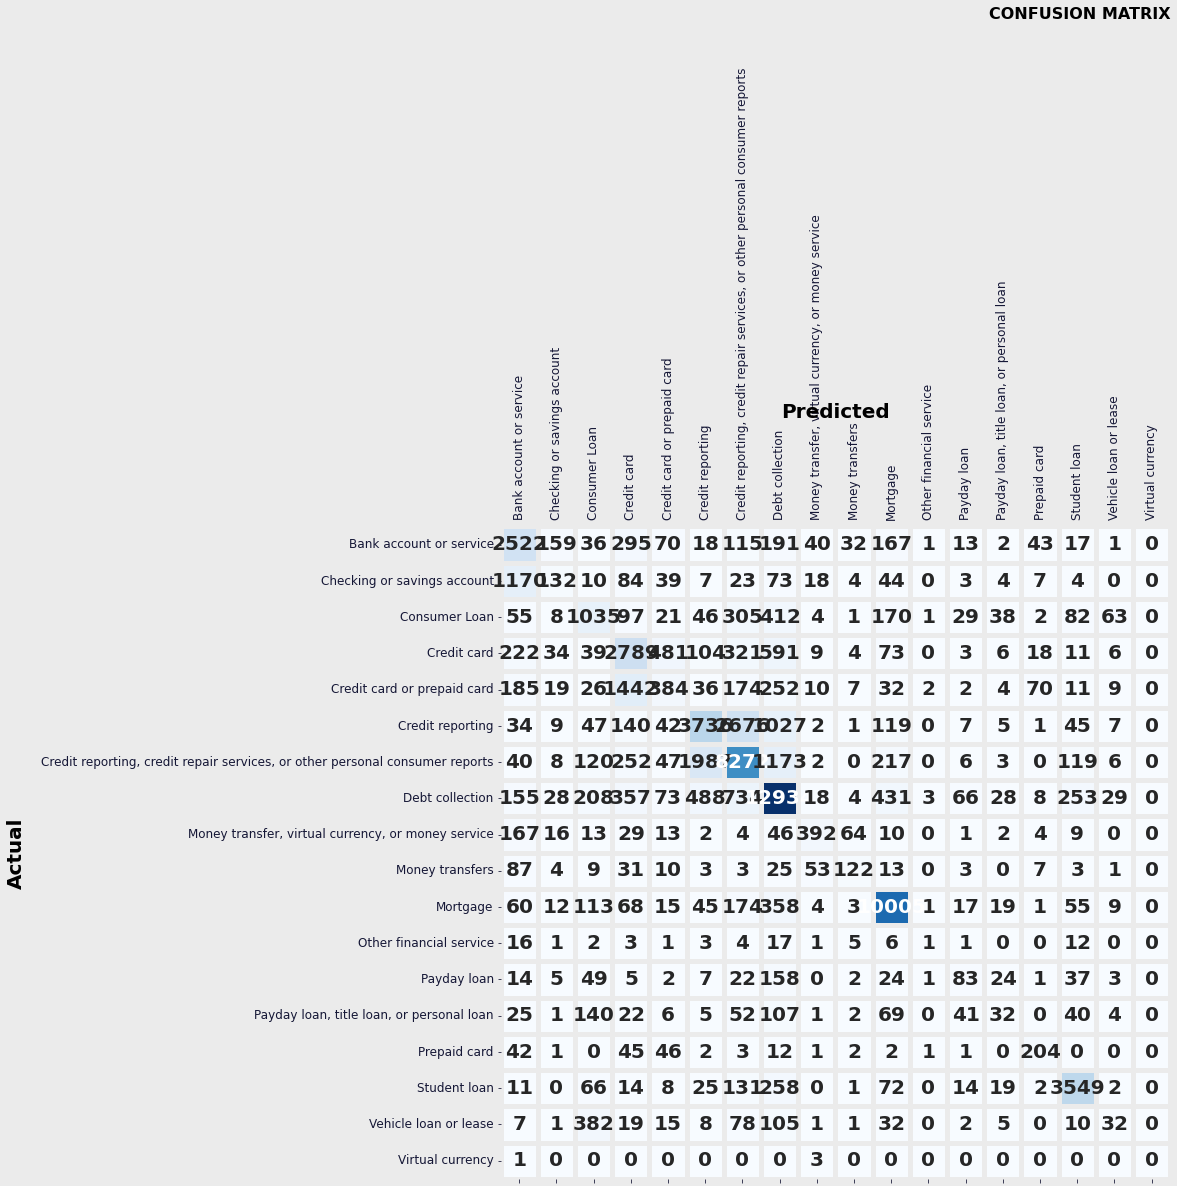

In [ ]:
cm = confusion_matrix(y_test, preds, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)